In [1]:
import numpy as np
from numpy.core.numeric import True_
import get_cup_dataset as dt
from SVR import SVR
import time
import matplotlib.pyplot as plt
import sys
import math
import pickle

In [2]:
def plot_svr_predict(svr, x, y, pred, text="fig_title"):
    fig,axs = plt.subplots(2,5)
    for i in range(x.shape[1]):
        axs[i//(x.shape[1]//2)][i%(x.shape[1]//2)].scatter(x[:,i],y,color="red",marker='x')
        axs[i//(x.shape[1]//2)][i%(x.shape[1]//2)].scatter(x[:,i],pred,color="blue",marker='.')
    fig.suptitle(text)
    plt.show()

In [3]:
data, data_out = dt._get_cup('train')
test_split = 0.2
test_len = int(len(data)*test_split)
test, test_out = data[:test_len, :], data_out[:test_len, :]
test_out1, test_out2 = test_out[:, 0], test_out[:, 1]
dev_set, dev_out = data[test_len:, :], data_out[test_len:, :]
dev_out1, dev_out2 = dev_out[:, 0], dev_out[:, 1]

In [4]:
maxiter = 50000

# EPS: 0.1

# LINEAR

Training first model ... 


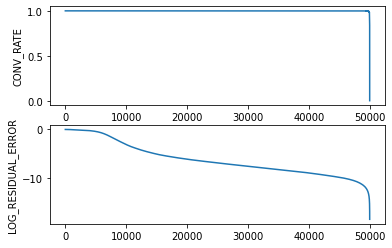

Fit time: 1156.7623205184937, #SV: 1207
SUM OF eps-LOSS: 22092.890983711884
DEVSET MEE: 3.4799691839652938


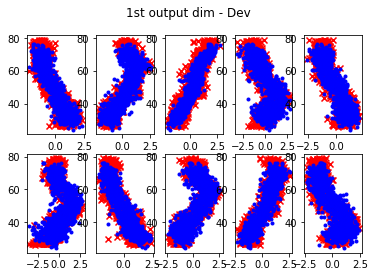

Testing the model
SUM OF eps-LOSS: 5763.076446444776
TEST MEE: 3.5998530437357545


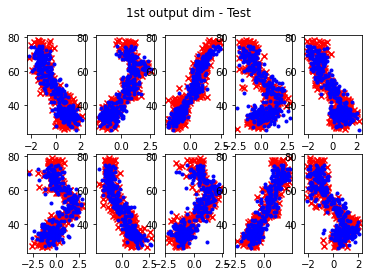

In [5]:
cup_model = SVR('linear', box=0.1)
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 0.1, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


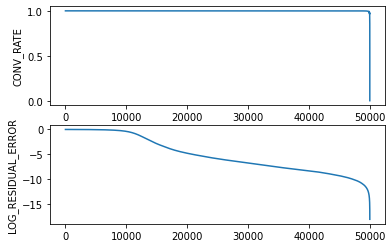

Fit time: 1276.6115546226501, #SV: 1217
SUM OF eps-LOSS: 22032.824682267834
DEVSET MEE: 3.4613037265025715


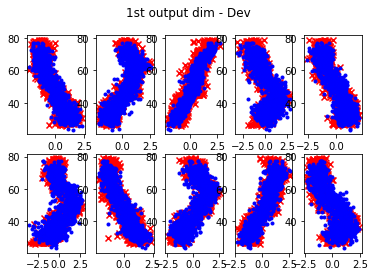

Testing the model
SUM OF eps-LOSS: 5762.951846689255
TEST MEE: 3.5615961045160387


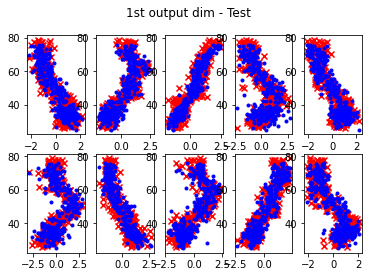

In [6]:
cup_model1 = SVR('linear', box=1)
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 0.1, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


C:\Users\eliak\OneDrive\Desktop\UNIPI\ML_CM\ML-CM-Project\cm_scripts\SVR.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  plot_conv_rate.append((self.history['f'][i+1] - self.history['fstar']) / (self.history['f'][i] - self.history['fstar']))
C:\Users\eliak\OneDrive\Desktop\UNIPI\ML_CM\ML-CM-Project\cm_scripts\SVR.py:69: RuntimeWarning: divide by zero encountered in log
  log_residual_error.append(np.log(np.abs(self.history['f'][i] - self.history['fstar']) / np.abs(self.history['fstar'])))


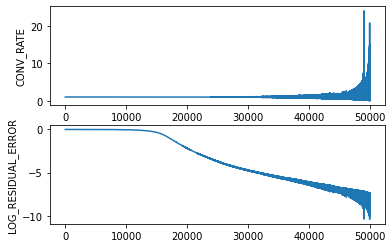

Fit time: 1359.6830921173096, #SV: 1220
SUM OF eps-LOSS: 6200972.437459249
DEVSET MEE: 66.65493921153849


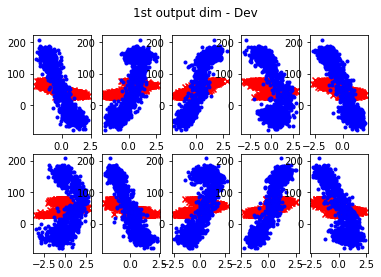

Testing the model
SUM OF eps-LOSS: 1497718.1405731346
TEST MEE: 64.72631193203621


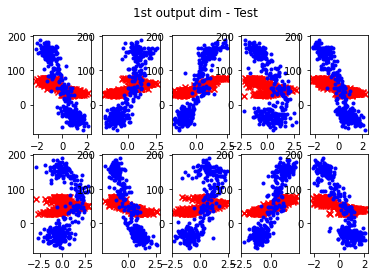

In [7]:
cup_model2 = SVR('linear', box=10)
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 0.1, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [8]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

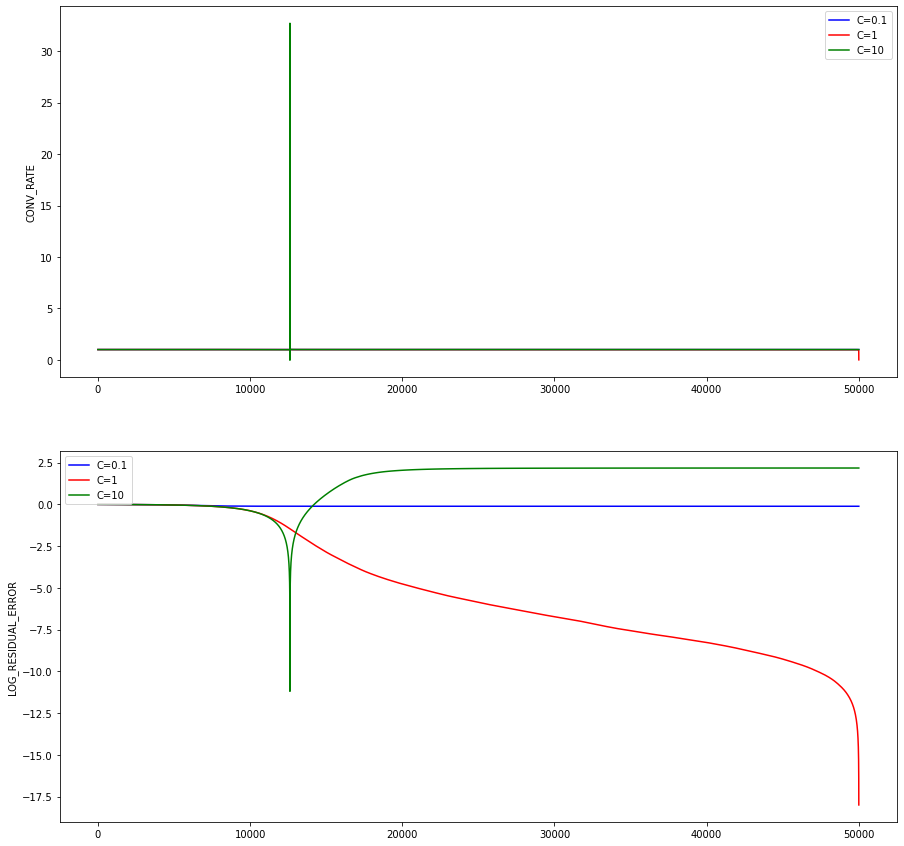

In [9]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

lin_01_0, lin_01_1, lin_01_2 = cup_model, cup_model, cup_model2


In [10]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-440.2521472039094,
 -4131.562546737389,
 -40622.82422076677,
 array([  0.91121033,   0.91124672, -21.30015805]))

# POLY

Training first model ... 


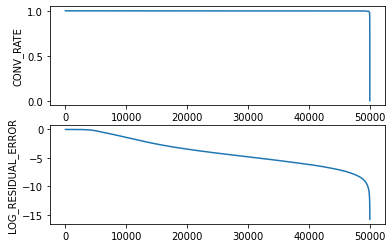

Fit time: 1199.5549998283386, #SV: 1201
SUM OF eps-LOSS: 27257.31937998294
DEVSET MEE: 3.452276691615438


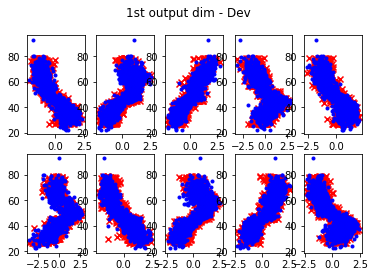

Testing the model
SUM OF eps-LOSS: 6338.289448595224
TEST MEE: 3.368018528614945


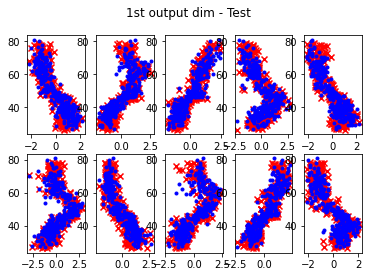

In [11]:
cup_model = SVR('poly', box=0.1, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 0.1, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


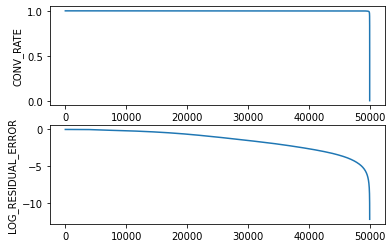

Fit time: 1359.5009996891022, #SV: 1219
SUM OF eps-LOSS: 10832.72112532501
DEVSET MEE: 2.2102842526160744


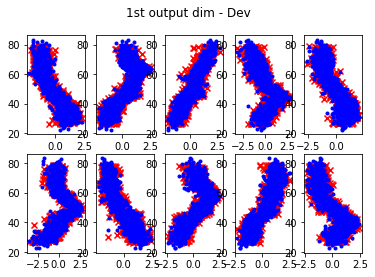

Testing the model
SUM OF eps-LOSS: 2718.9042121423163
TEST MEE: 2.2362775261069245


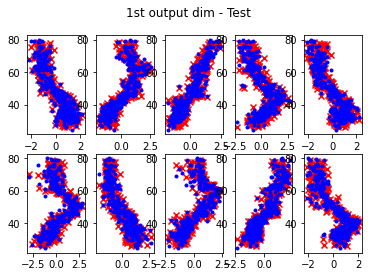

In [12]:
cup_model1 = SVR('poly', box=1, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 0.1, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


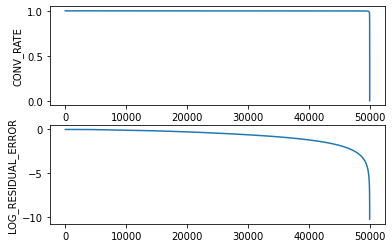

Fit time: 1387.5330390930176, #SV: 1220
SUM OF eps-LOSS: 6860.945329123632
DEVSET MEE: 1.909145451540547


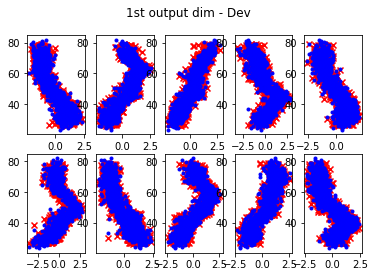

Testing the model
SUM OF eps-LOSS: 2105.3309912446543
TEST MEE: 2.0938197385643393


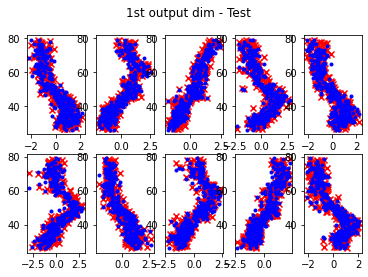

In [13]:
cup_model2 = SVR('poly', box=10, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 0.1, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [14]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

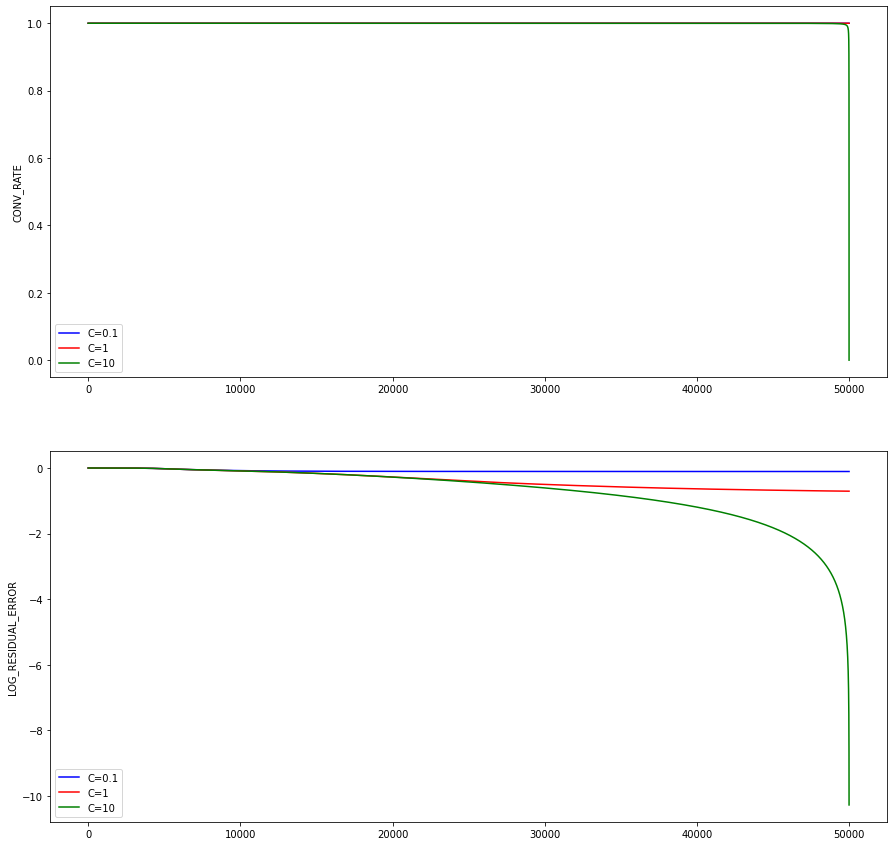

In [15]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

poly_01_0, poly_01_1, poly_01_2 = cup_model, cup_model, cup_model2

In [16]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-619.3077049123085,
 -3110.839408967779,
 -6140.3740014598825,
 array([0.90287737, 0.9576486 , 0.96688935]))

# SIGMOID

Training first model ... 


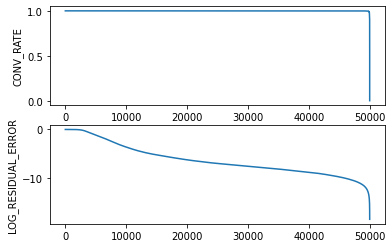

Fit time: 1205.5870926380157, #SV: 1200
SUM OF eps-LOSS: 42230.11808514253
DEVSET MEE: 4.600573916805384


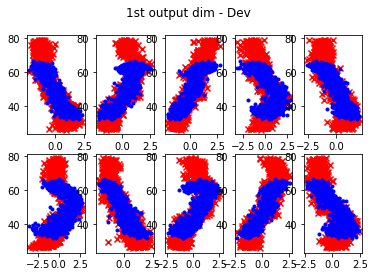

Testing the model
SUM OF eps-LOSS: 10275.199713583725
TEST MEE: 4.632751089785616


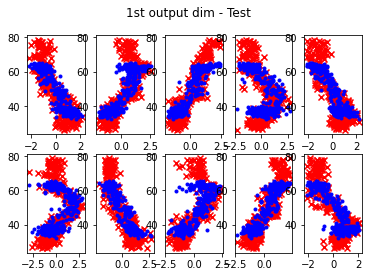

In [17]:
cup_model = SVR('sigmoid', box=0.1, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 0.1, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


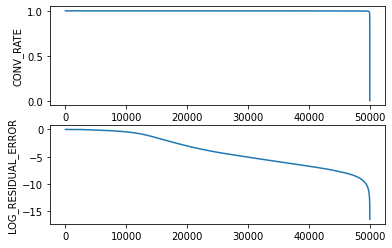

Fit time: 1278.4600591659546, #SV: 1218
SUM OF eps-LOSS: 25826.6479631413
DEVSET MEE: 3.760041010745247


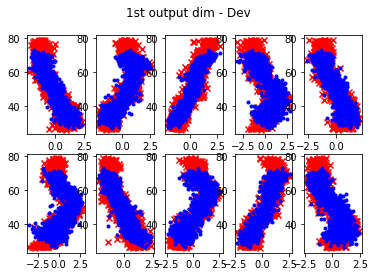

Testing the model
SUM OF eps-LOSS: 6425.645617748191
TEST MEE: 3.798433897987618


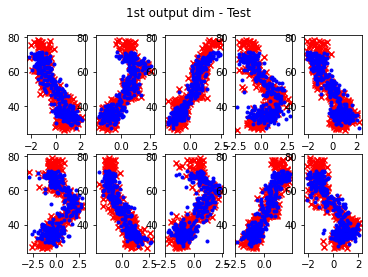

In [18]:
cup_model1 = SVR('sigmoid', box=1, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 0.1, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


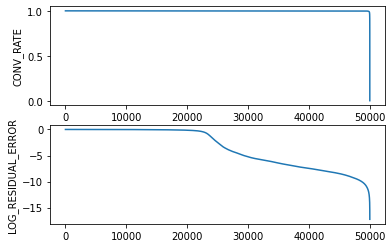

Fit time: 1354.6094241142273, #SV: 1220
SUM OF eps-LOSS: 498249.52744155534
DEVSET MEE: 15.824570451371622


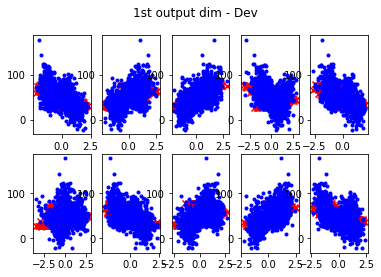

Testing the model
SUM OF eps-LOSS: 125663.86769056747
TEST MEE: 16.58235120184065


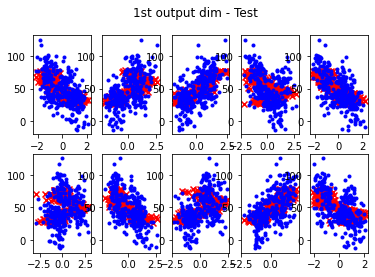

In [19]:
cup_model2 = SVR('sigmoid', box=10, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 0.1, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [20]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

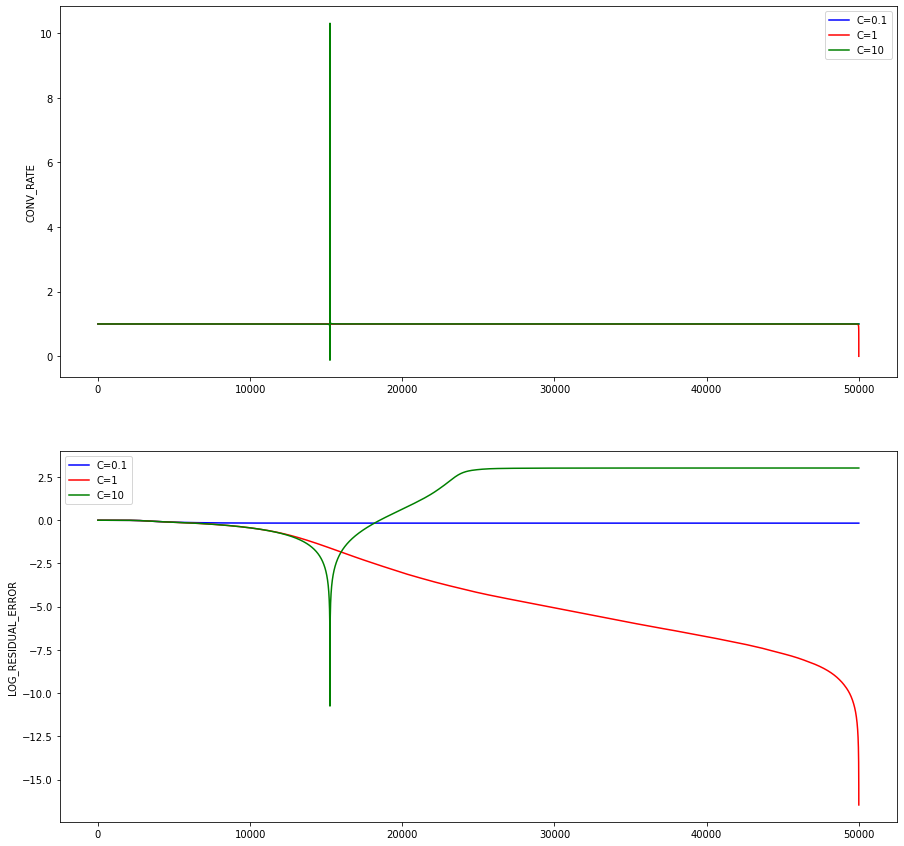

In [21]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

sig_01_0, sig_01_1, sig_01_2 = cup_model, cup_model, cup_model2

In [22]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-751.289583221211,
 -4849.222976778906,
 -104242.14627595941,
 array([ 0.84327081,  0.90119169, -0.88108995]))

# RBF

Training first model ... 


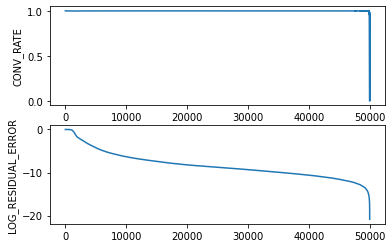

Fit time: 1209.7793674468994, #SV: 1211
SUM OF eps-LOSS: 28437.936132663377
DEVSET MEE: 3.5683476205868994


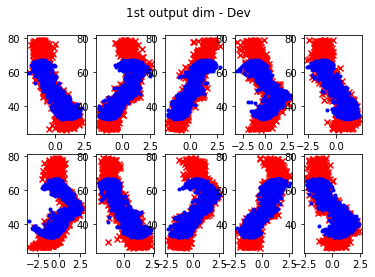

Testing the model
SUM OF eps-LOSS: 6717.735573911336
TEST MEE: 3.4846067476798734


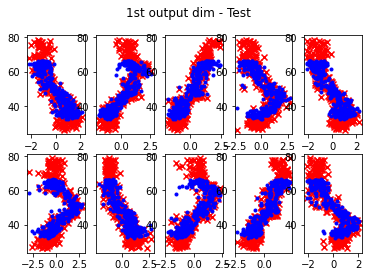

In [23]:
cup_model = SVR('rbf', box=0.1, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 0.1, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


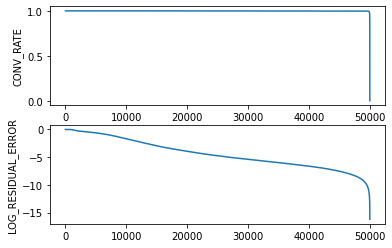

Fit time: 1346.3452858924866, #SV: 1220
SUM OF eps-LOSS: 6849.8263491016305
DEVSET MEE: 1.8310906253442483


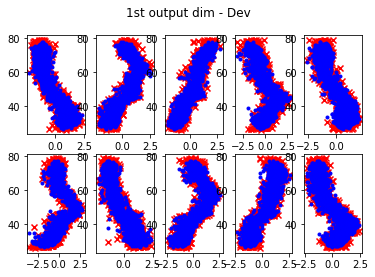

Testing the model
SUM OF eps-LOSS: 1918.4857497873902
TEST MEE: 1.9421286604242198


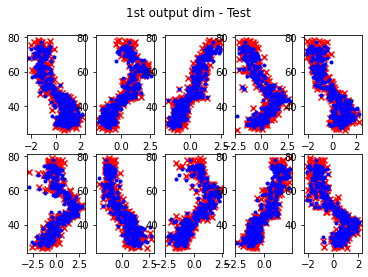

In [24]:
cup_model1 = SVR('rbf', box=1.0, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 0.1, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


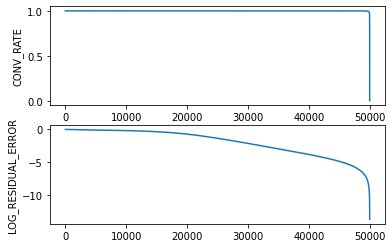

Fit time: 1509.703709602356, #SV: 1219
SUM OF eps-LOSS: 4626.839496747884
DEVSET MEE: 1.443197034559226


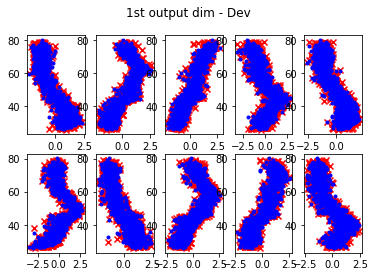

Testing the model
SUM OF eps-LOSS: 1680.4141405277373
TEST MEE: 1.810744997496953


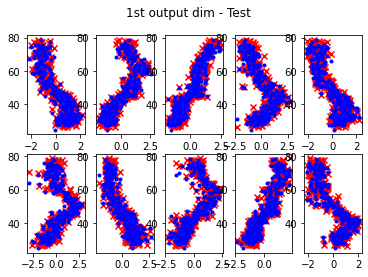

In [25]:
cup_model2 = SVR('rbf', box=10, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 0.1, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [26]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

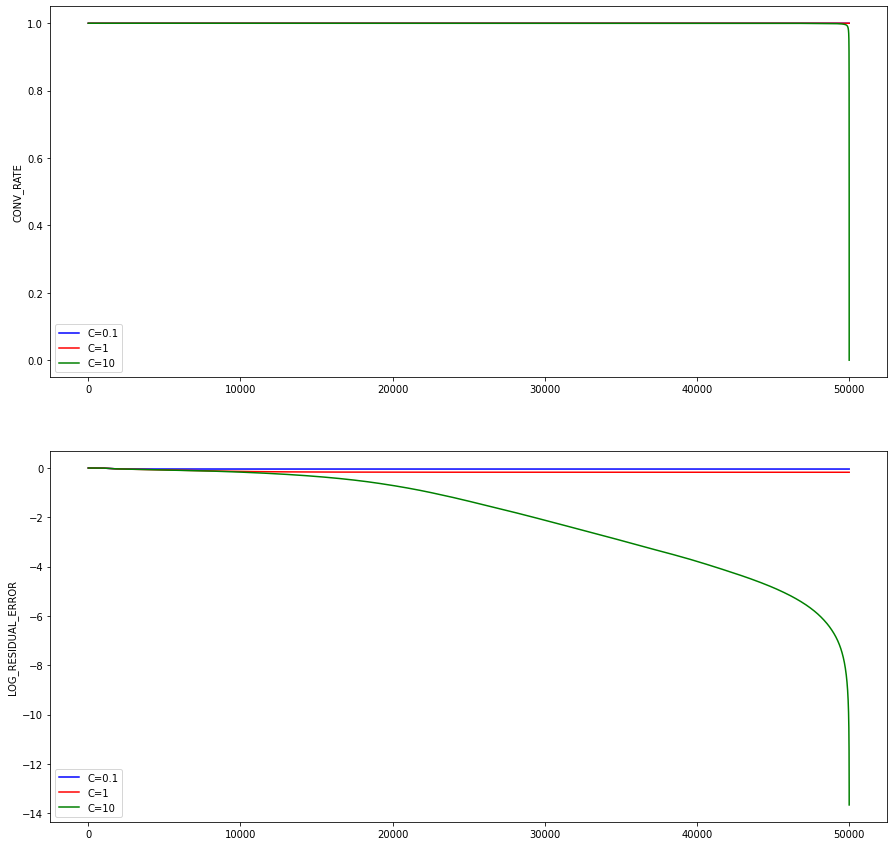

In [27]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

rbf_01_0, rbf_01_1, rbf_01_2 = cup_model, cup_model, cup_model2

In [28]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-761.2869355222451,
 -2955.966805085636,
 -18673.962577999715,
 array([0.8971371 , 0.96980012, 0.97345489]))

# EPS: 0.5

# LINEAR

Training first model ... 


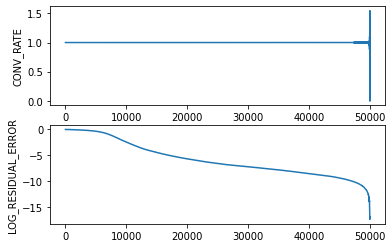

Fit time: 1240.0609595775604, #SV: 1201
SUM OF eps-LOSS: 22090.149031955425
DEVSET MEE: 3.4817114760483165


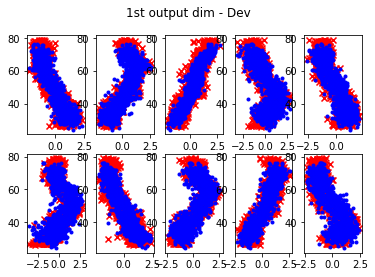

Testing the model
SUM OF eps-LOSS: 5762.006749037134
TEST MEE: 3.6032163172111824


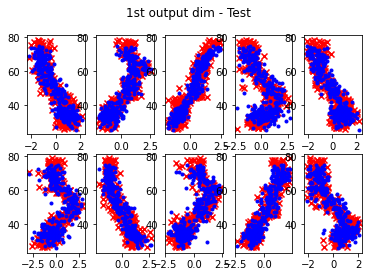

In [29]:
cup_model = SVR('linear', box=0.1)
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 0.5, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


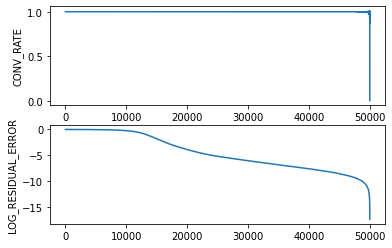

Fit time: 1382.156131029129, #SV: 1220
SUM OF eps-LOSS: 22032.533256228497
DEVSET MEE: 3.462412033505829


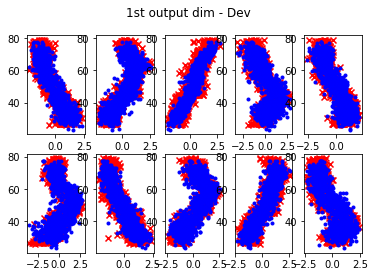

Testing the model
SUM OF eps-LOSS: 5753.840010049783
TEST MEE: 3.5498251159711742


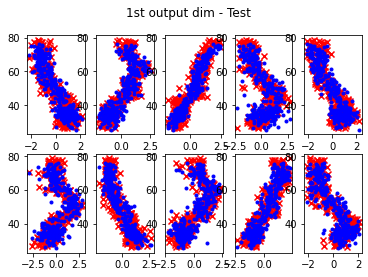

In [30]:
cup_model1 = SVR('linear', box=1)
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 0.5, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


C:\Users\eliak\OneDrive\Desktop\UNIPI\ML_CM\ML-CM-Project\cm_scripts\SVR.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  plot_conv_rate.append((self.history['f'][i+1] - self.history['fstar']) / (self.history['f'][i] - self.history['fstar']))
C:\Users\eliak\OneDrive\Desktop\UNIPI\ML_CM\ML-CM-Project\cm_scripts\SVR.py:69: RuntimeWarning: divide by zero encountered in log
  log_residual_error.append(np.log(np.abs(self.history['f'][i] - self.history['fstar']) / np.abs(self.history['fstar'])))


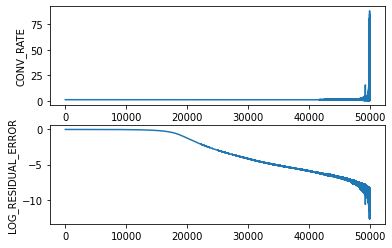

Fit time: 1503.9767744541168, #SV: 1220
SUM OF eps-LOSS: 4784429.285133727
DEVSET MEE: 58.56256455899442


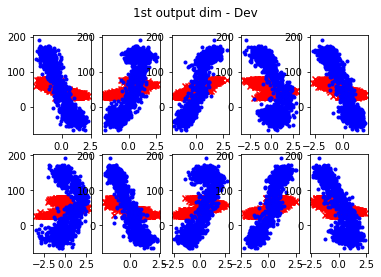

Testing the model
SUM OF eps-LOSS: 1156177.74345293
TEST MEE: 56.88558260636688


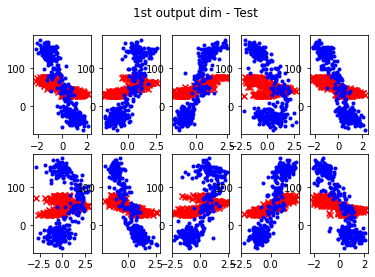

In [31]:
cup_model2 = SVR('linear', box=10)
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 0.5, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [32]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

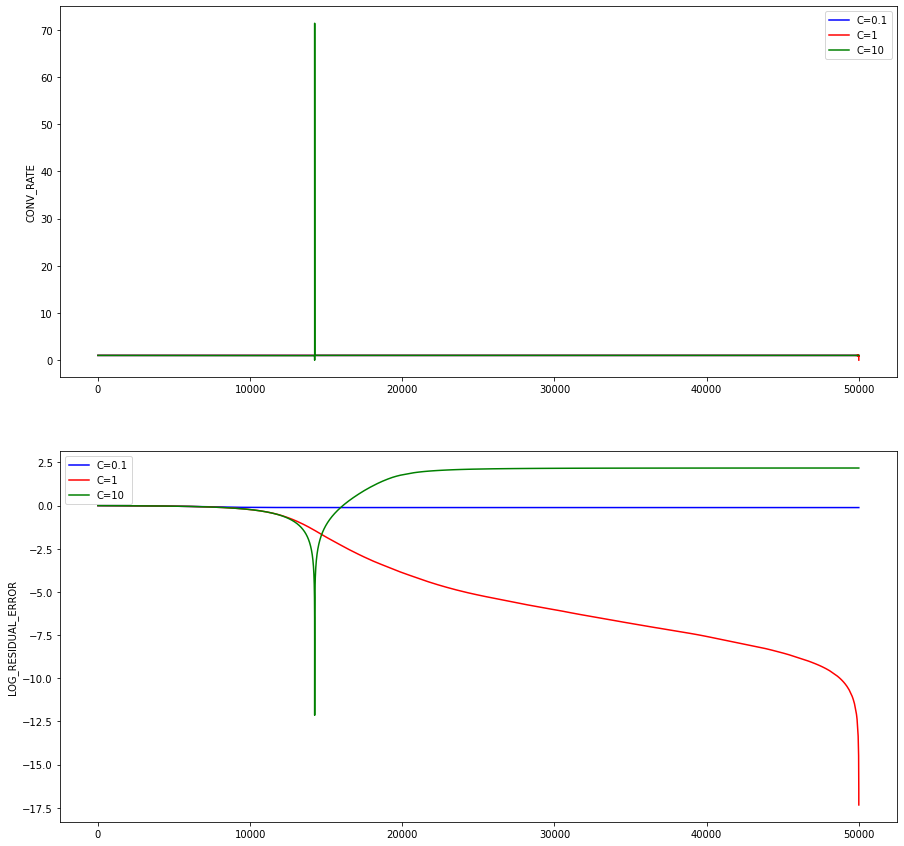

In [33]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

lin_05_0, lin_05_1, lin_05_2 = cup_model, cup_model, cup_model2


In [34]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-393.9584922087769,
 -3669.4018931125056,
 -36063.50410649405,
 array([  0.91122342,   0.91139288, -16.22105616]))

# POLY

Training first model ... 


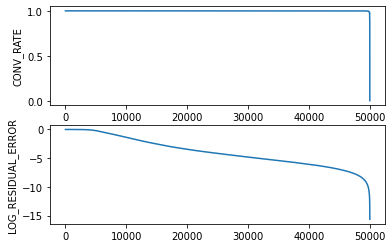

Fit time: 1172.148603439331, #SV: 1153
SUM OF eps-LOSS: 27380.696967960284
DEVSET MEE: 3.4748008887987387


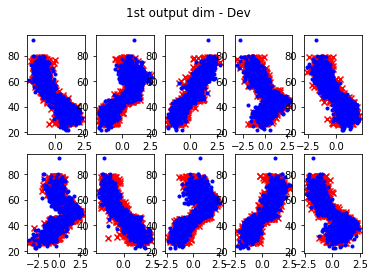

Testing the model
SUM OF eps-LOSS: 6369.890534114728
TEST MEE: 3.3904185044060795


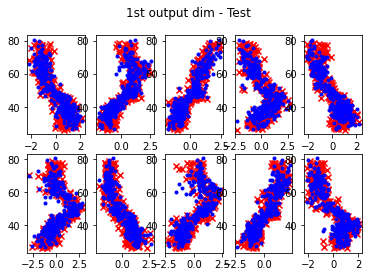

In [35]:
cup_model = SVR('poly', box=0.1, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 0.5, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


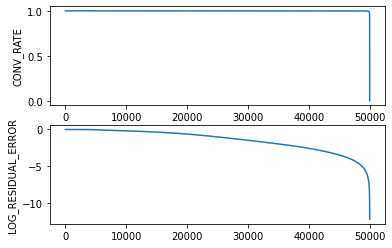

Fit time: 1300.8845300674438, #SV: 1197
SUM OF eps-LOSS: 10694.84265178526
DEVSET MEE: 2.2154095207963125


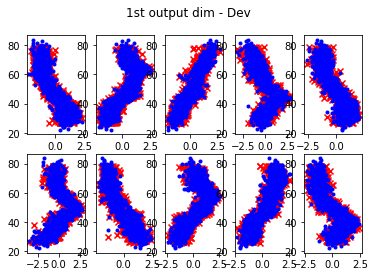

Testing the model
SUM OF eps-LOSS: 2712.917477297001
TEST MEE: 2.2428721053546177


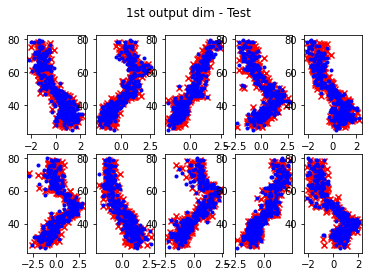

In [36]:
cup_model1 = SVR('poly', box=1, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 0.5, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


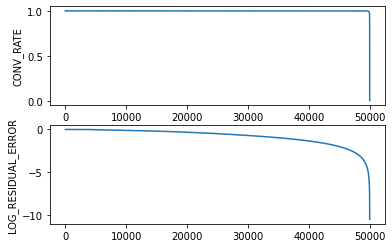

Fit time: 1366.5782425403595, #SV: 1206
SUM OF eps-LOSS: 7232.778197589215
DEVSET MEE: 1.958958619567369


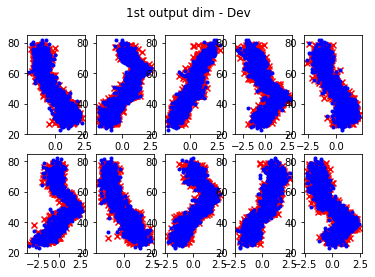

Testing the model
SUM OF eps-LOSS: 2141.0390253734367
TEST MEE: 2.105861605123887


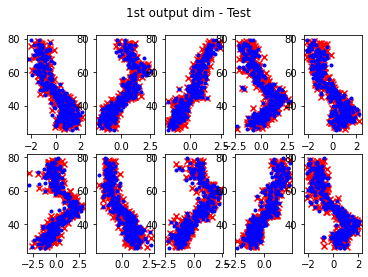

In [37]:
cup_model2 = SVR('poly', box=10, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 0.5, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [38]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

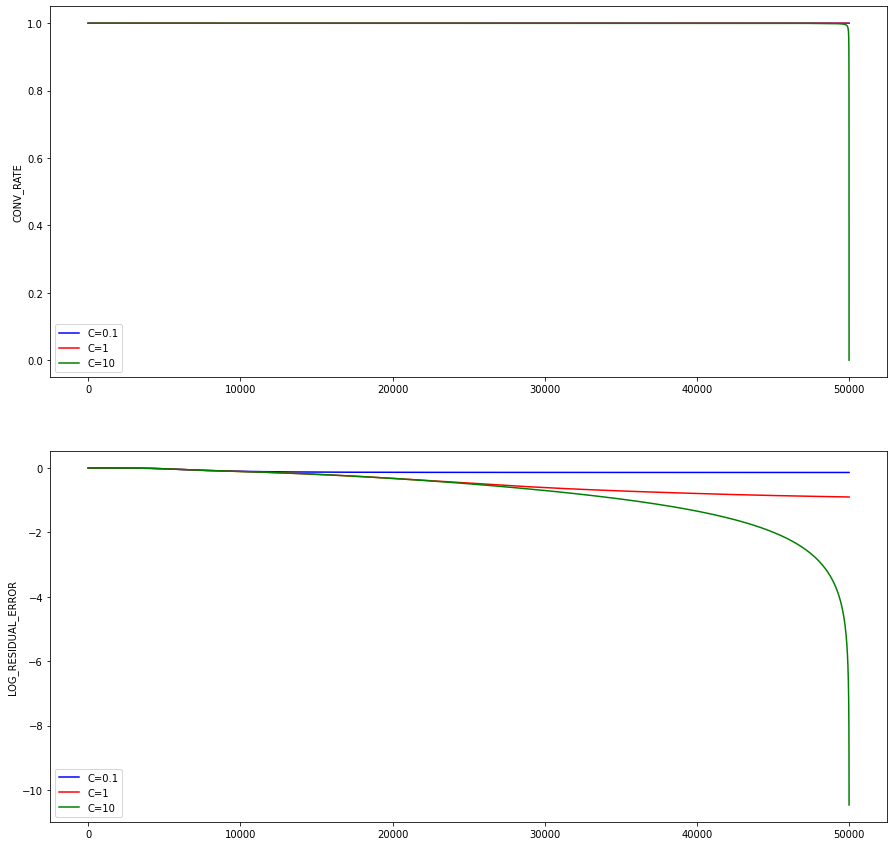

In [39]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

poly_05_0, poly_05_1, poly_05_2 = cup_model, cup_model, cup_model2

In [40]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-574.2023006349687,
 -2638.585900462611,
 -4447.488869134741,
 array([0.90238794, 0.9577313 , 0.96634748]))

# SIGMOID

Training first model ... 


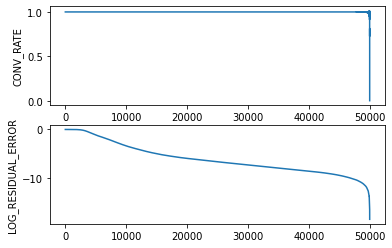

Fit time: 1181.2651407718658, #SV: 1194
SUM OF eps-LOSS: 42412.80947296529
DEVSET MEE: 4.610229438252769


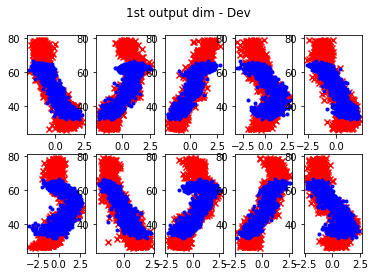

Testing the model
SUM OF eps-LOSS: 10321.175607575682
TEST MEE: 4.641851991615319


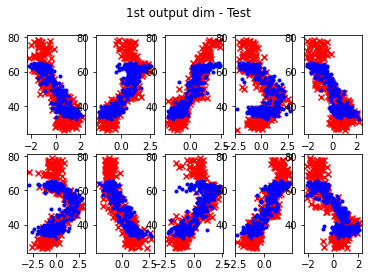

In [41]:
cup_model = SVR('sigmoid', box=0.1, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 0.5, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


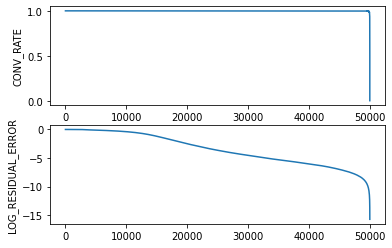

Fit time: 1294.5653092861176, #SV: 1217
SUM OF eps-LOSS: 25466.529950354798
DEVSET MEE: 3.747268202261864


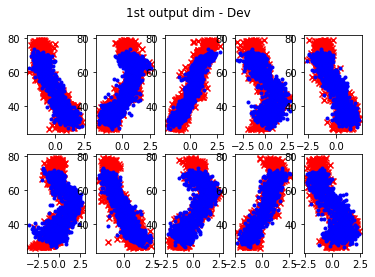

Testing the model
SUM OF eps-LOSS: 6370.0968770290365
TEST MEE: 3.789332641802899


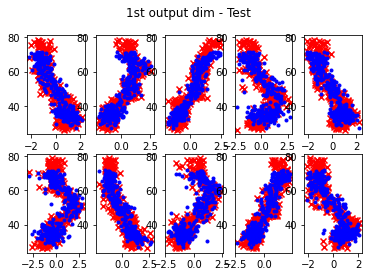

In [42]:
cup_model1 = SVR('sigmoid', box=1, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 0.5, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


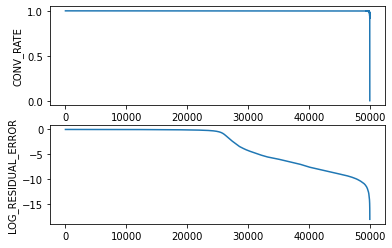

Fit time: 1195.5266387462616, #SV: 1220
SUM OF eps-LOSS: 500805.48259626405
DEVSET MEE: 15.87704644497791


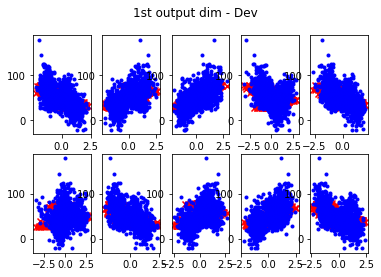

Testing the model
SUM OF eps-LOSS: 126255.82275915759
TEST MEE: 16.621775855823252


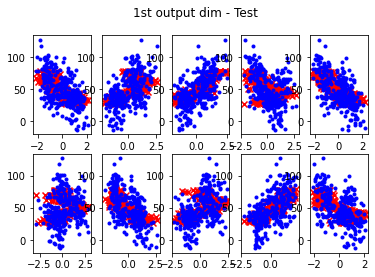

In [43]:
cup_model2 = SVR('sigmoid', box=10, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 0.5, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [44]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

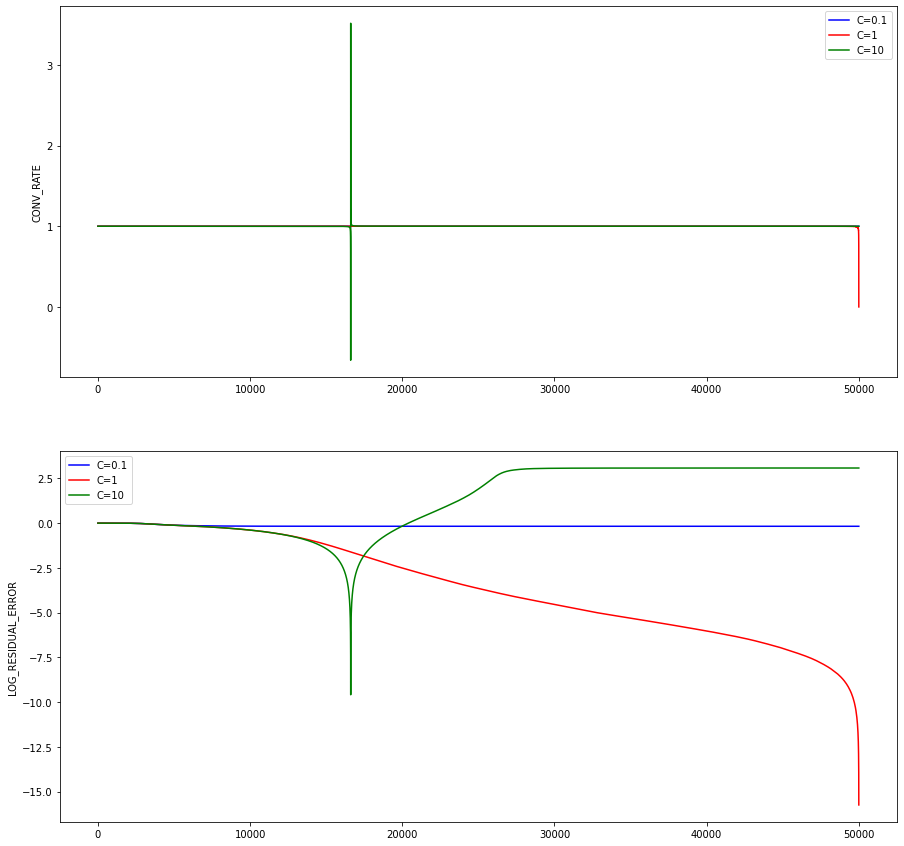

In [45]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

sig_05_0, sig_05_1, sig_05_2 = cup_model, cup_model, cup_model2

In [46]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-704.8895342185058,
 -4380.6670312907945,
 -99677.20902908732,
 array([ 0.84257984,  0.90202494, -0.88991627]))

# RBF

Training first model ... 


C:\Users\eliak\OneDrive\Desktop\UNIPI\ML_CM\ML-CM-Project\cm_scripts\SVR.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  plot_conv_rate.append((self.history['f'][i+1] - self.history['fstar']) / (self.history['f'][i] - self.history['fstar']))
C:\Users\eliak\OneDrive\Desktop\UNIPI\ML_CM\ML-CM-Project\cm_scripts\SVR.py:69: RuntimeWarning: divide by zero encountered in log
  log_residual_error.append(np.log(np.abs(self.history['f'][i] - self.history['fstar']) / np.abs(self.history['fstar'])))


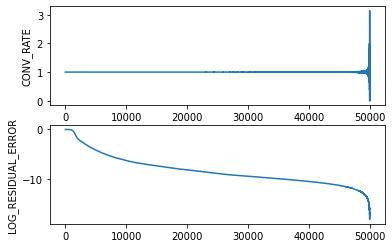

Fit time: 1060.607747554779, #SV: 1206
SUM OF eps-LOSS: 28853.075907553783
DEVSET MEE: 3.5942686780229347


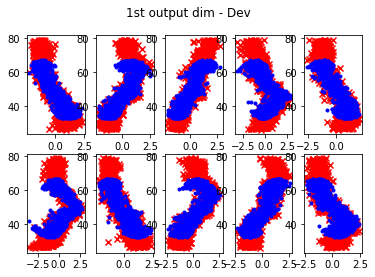

Testing the model
SUM OF eps-LOSS: 6827.960888404361
TEST MEE: 3.5123871166660536


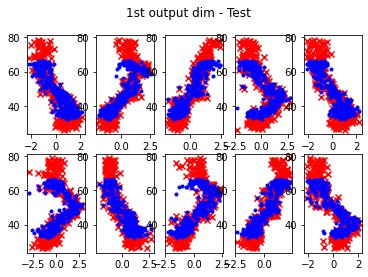

In [47]:
cup_model = SVR('rbf', box=0.1, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 0.5, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


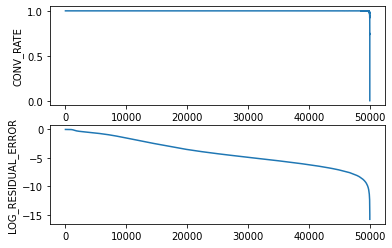

Fit time: 1264.5080606937408, #SV: 1215
SUM OF eps-LOSS: 6863.219159597291
DEVSET MEE: 1.8502842598357485


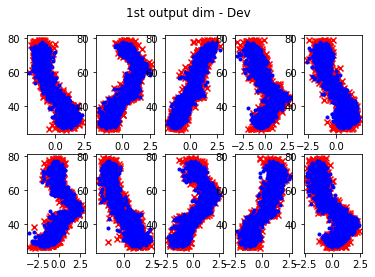

Testing the model
SUM OF eps-LOSS: 1927.1881264133085
TEST MEE: 1.952124939693595


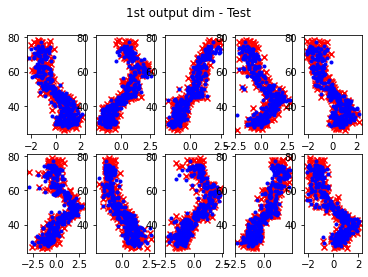

In [48]:
cup_model1 = SVR('rbf', box=1.0, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 0.5, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


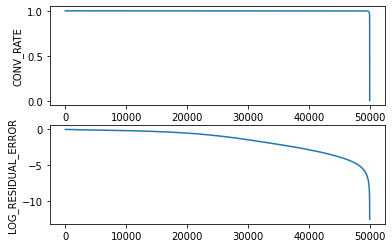

Fit time: 1447.2849168777466, #SV: 1218
SUM OF eps-LOSS: 4567.470689350318
DEVSET MEE: 1.490641060285785


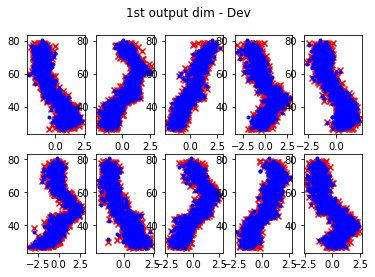

Testing the model
SUM OF eps-LOSS: 1655.028309808232
TEST MEE: 1.7879906320794587


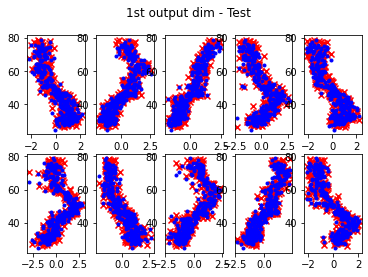

In [49]:
cup_model2 = SVR('rbf', box=10, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 0.5, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [50]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

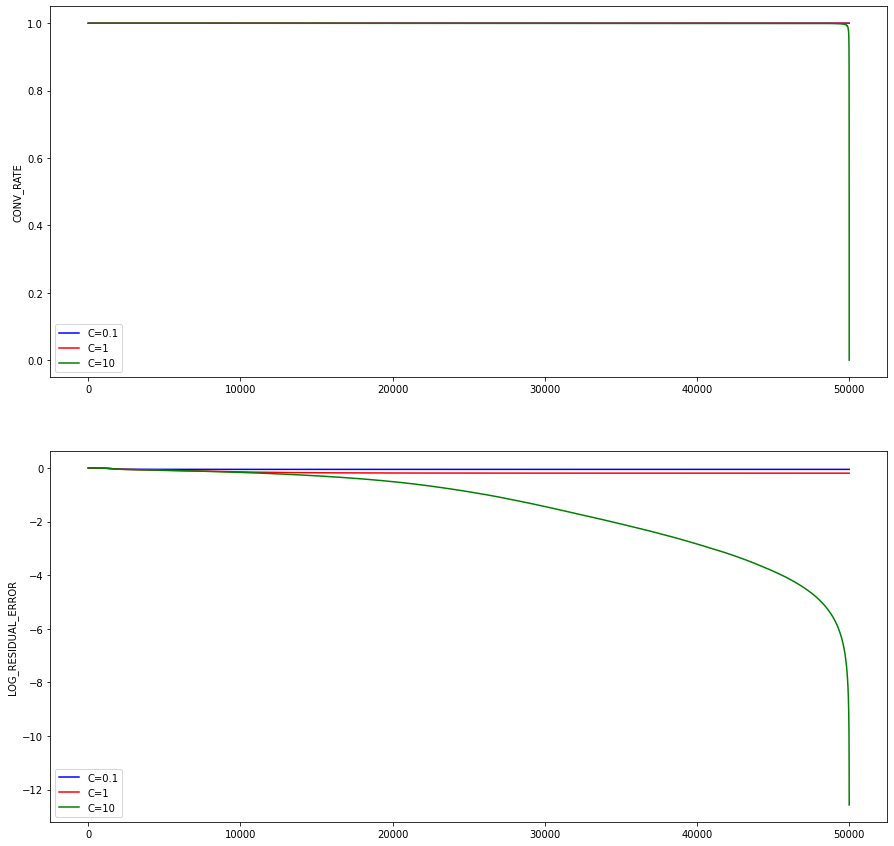

In [51]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

rbf_05_0, rbf_05_1, rbf_05_2 = cup_model, cup_model, cup_model2

In [52]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-716.3625130642487,
 -2528.851626713206,
 -14429.276005138017,
 array([0.89547513, 0.96966212, 0.97385196]))

# EPS: 1.0

# LINEAR

Training first model ... 


C:\Users\eliak\OneDrive\Desktop\UNIPI\ML_CM\ML-CM-Project\cm_scripts\SVR.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  plot_conv_rate.append((self.history['f'][i+1] - self.history['fstar']) / (self.history['f'][i] - self.history['fstar']))
C:\Users\eliak\OneDrive\Desktop\UNIPI\ML_CM\ML-CM-Project\cm_scripts\SVR.py:69: RuntimeWarning: divide by zero encountered in log
  log_residual_error.append(np.log(np.abs(self.history['f'][i] - self.history['fstar']) / np.abs(self.history['fstar'])))


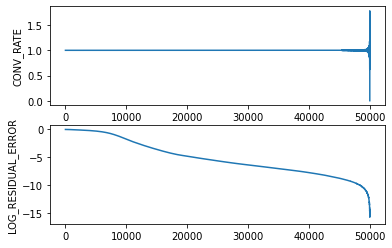

Fit time: 1104.7874374389648, #SV: 1194
SUM OF eps-LOSS: 22161.30005136845
DEVSET MEE: 3.489310500309443


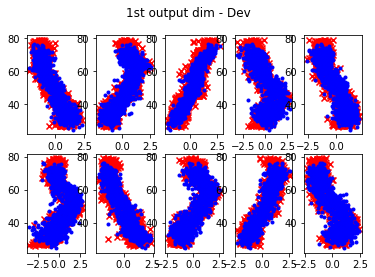

Testing the model
SUM OF eps-LOSS: 5730.327831109191
TEST MEE: 3.596662456335818


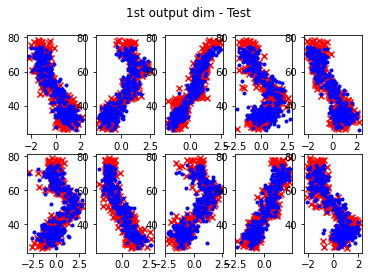

In [53]:
cup_model = SVR('linear', box=0.1)
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 1.0, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


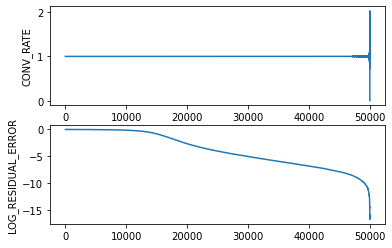

Fit time: 1186.8709771633148, #SV: 1216
SUM OF eps-LOSS: 22030.860104787014
DEVSET MEE: 3.4660361659945735


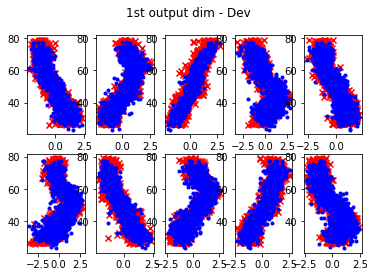

Testing the model
SUM OF eps-LOSS: 5739.329770843273
TEST MEE: 3.5448860255572154


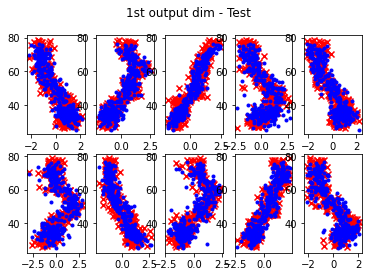

In [54]:
cup_model1 = SVR('linear', box=1)
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 1.0, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


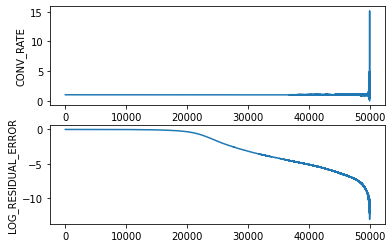

Fit time: 1308.8854038715363, #SV: 1218
SUM OF eps-LOSS: 2918746.653327456
DEVSET MEE: 45.71230937671848


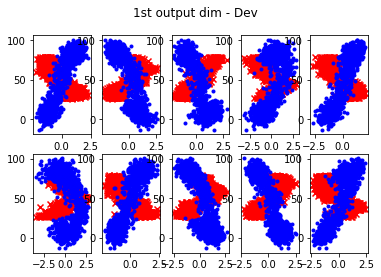

Testing the model
SUM OF eps-LOSS: 699144.4791434164
TEST MEE: 44.33212639628456


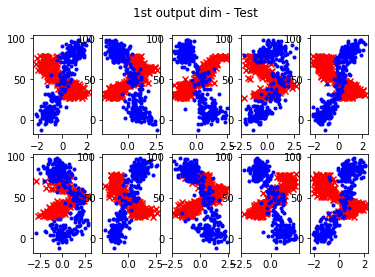

In [55]:
cup_model2 = SVR('linear', box=10)
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 1.0, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [56]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

<ipython-input-57-49a7f6f98114>:8: RuntimeWarning: divide by zero encountered in double_scalars
  plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
<ipython-input-57-49a7f6f98114>:9: RuntimeWarning: divide by zero encountered in log
  log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))


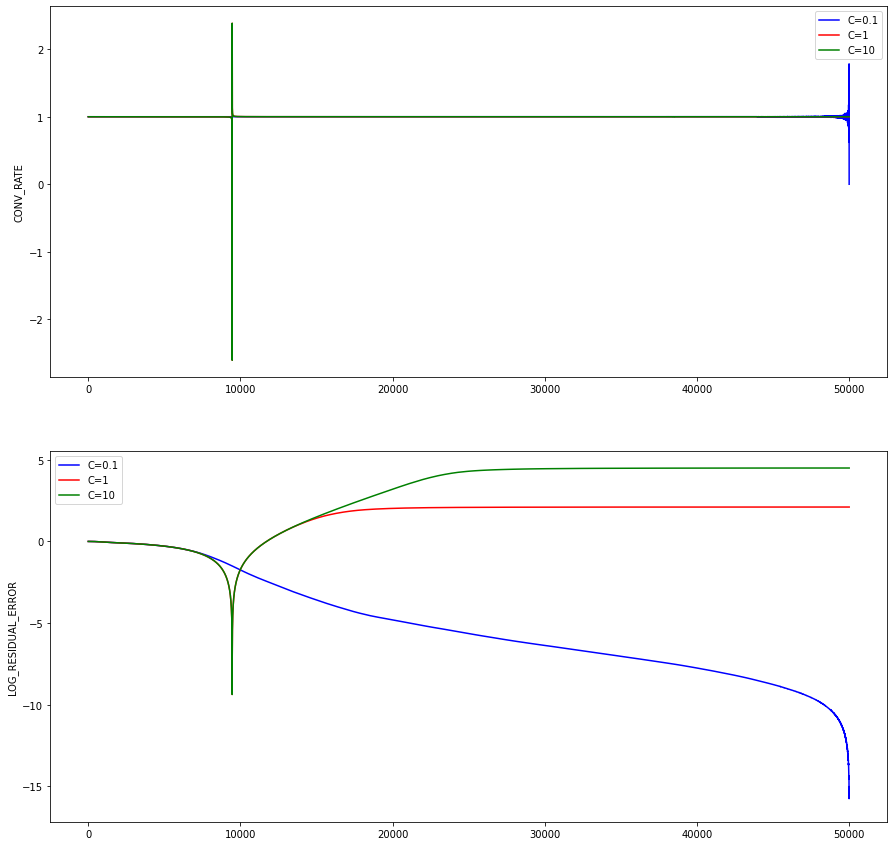

In [57]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

lin_10_0, lin_10_1, lin_10_2 = cup_model, cup_model, cup_model2

In [58]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-340.1686197286378,
 -3136.247335386992,
 -30826.228856354122,
 array([ 0.91169958,  0.91161278, -9.42258019]))

# POLY

Training first model ... 


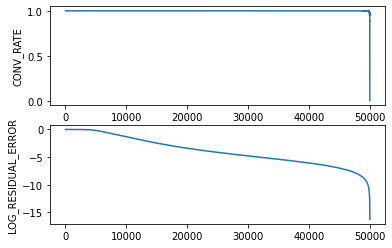

Fit time: 1131.8430507183075, #SV: 1135
SUM OF eps-LOSS: 27814.67075487627
DEVSET MEE: 3.515061481247972


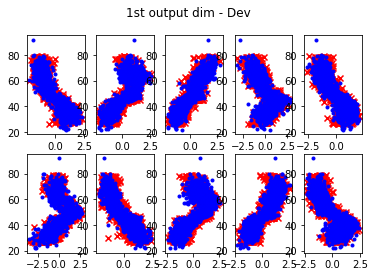

Testing the model
SUM OF eps-LOSS: 6476.4154990750185
TEST MEE: 3.4328836219244683


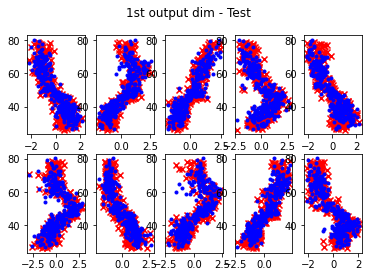

In [59]:
cup_model = SVR('poly', box=0.1, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 1.0, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


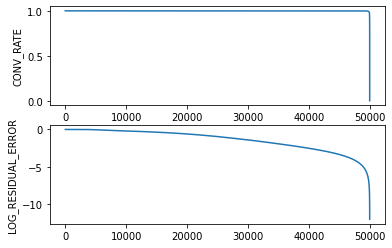

Fit time: 1247.8180780410767, #SV: 1181
SUM OF eps-LOSS: 10809.124387999638
DEVSET MEE: 2.2392157347228836


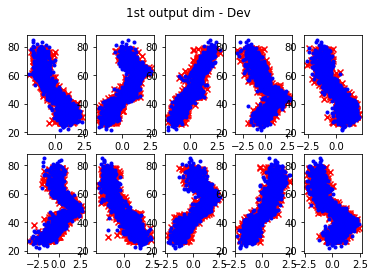

Testing the model
SUM OF eps-LOSS: 2768.9195299194716
TEST MEE: 2.2717428810233855


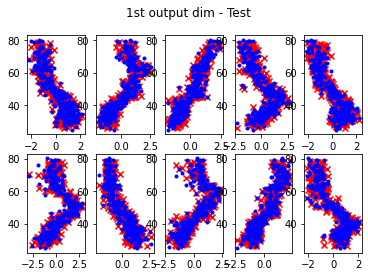

In [60]:
cup_model1 = SVR('poly', box=1, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 1.0, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


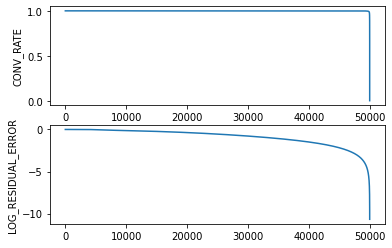

Fit time: 1207.2758331298828, #SV: 1209
SUM OF eps-LOSS: 7858.298627506687
DEVSET MEE: 2.029335417536223


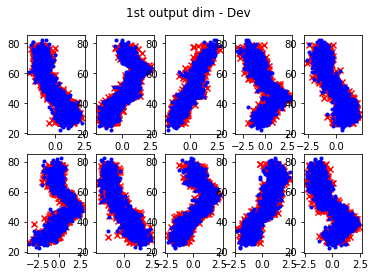

Testing the model
SUM OF eps-LOSS: 2243.4517258442575
TEST MEE: 2.154092677503159


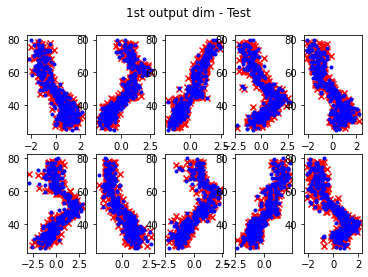

In [61]:
cup_model2 = SVR('poly', box=10, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 1.0, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [62]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

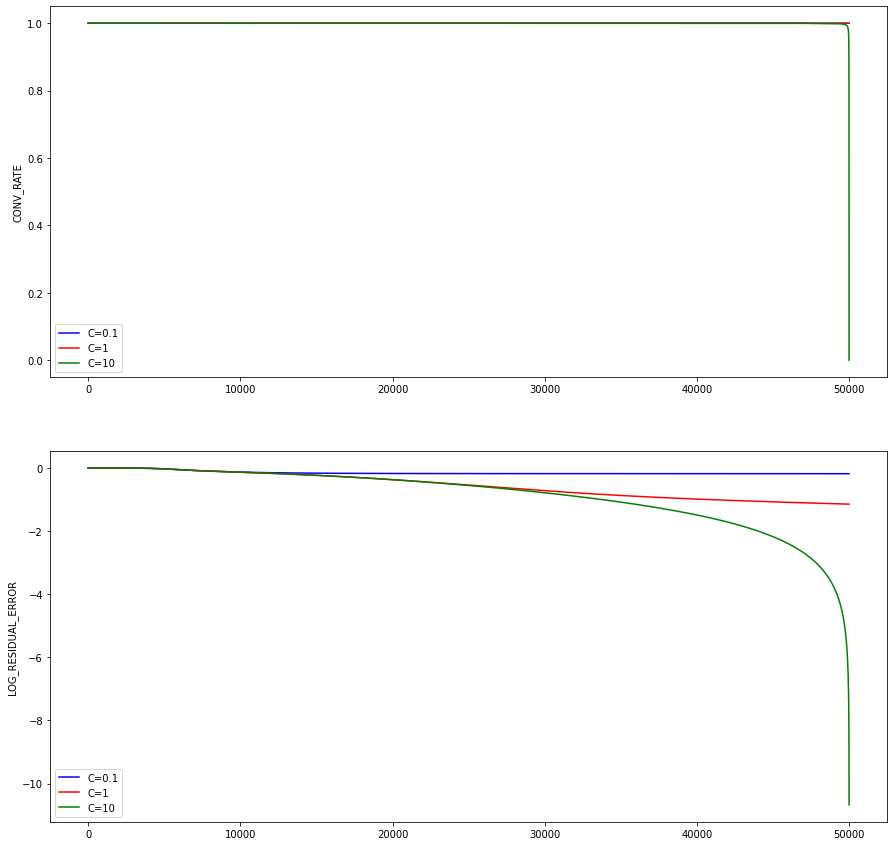

In [63]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

poly_10_0, poly_10_1, poly_10_2 = cup_model, cup_model, cup_model2

In [64]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-525.2045947300692,
 -2171.5974732957425,
 -3184.9221264645157,
 array([0.90076768, 0.95687387, 0.96478337]))

# SIGMOID

Training first model ... 


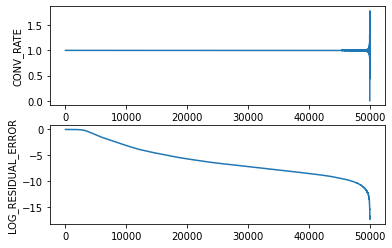

Fit time: 1125.3145503997803, #SV: 1190
SUM OF eps-LOSS: 41853.905546112364
DEVSET MEE: 4.589262365023389


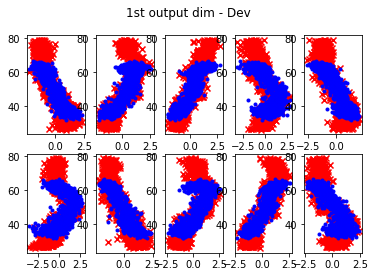

Testing the model
SUM OF eps-LOSS: 10196.97836762767
TEST MEE: 4.6241593069853275


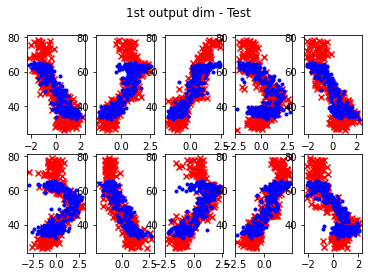

In [65]:
cup_model = SVR('sigmoid', box=0.1, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 1.0, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


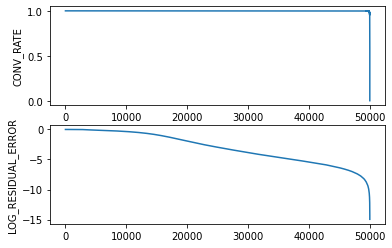

Fit time: 1370.6841223239899, #SV: 1214
SUM OF eps-LOSS: 25445.24188390637
DEVSET MEE: 3.7508794880940886


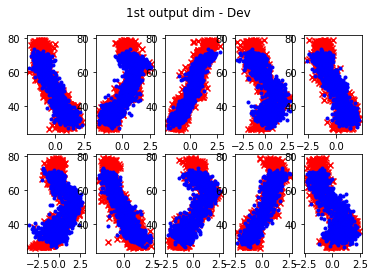

Testing the model
SUM OF eps-LOSS: 6378.612431351687
TEST MEE: 3.7931386506515574


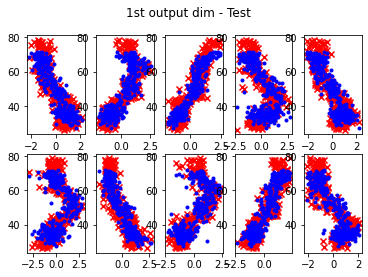

In [66]:
cup_model1 = SVR('sigmoid', box=1, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 1.0, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


C:\Users\eliak\OneDrive\Desktop\UNIPI\ML_CM\ML-CM-Project\cm_scripts\SVR.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  plot_conv_rate.append((self.history['f'][i+1] - self.history['fstar']) / (self.history['f'][i] - self.history['fstar']))
C:\Users\eliak\OneDrive\Desktop\UNIPI\ML_CM\ML-CM-Project\cm_scripts\SVR.py:69: RuntimeWarning: divide by zero encountered in log
  log_residual_error.append(np.log(np.abs(self.history['f'][i] - self.history['fstar']) / np.abs(self.history['fstar'])))


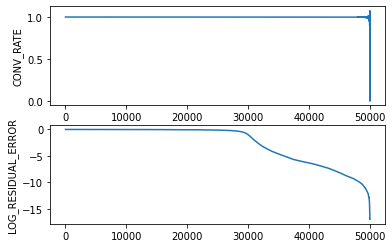

Fit time: 1443.8072760105133, #SV: 1220
SUM OF eps-LOSS: 511336.1277840683
DEVSET MEE: 16.037581470296843


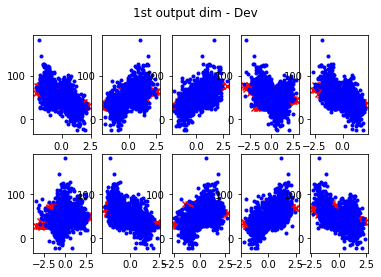

Testing the model
SUM OF eps-LOSS: 127966.0593206509
TEST MEE: 16.72088535021038


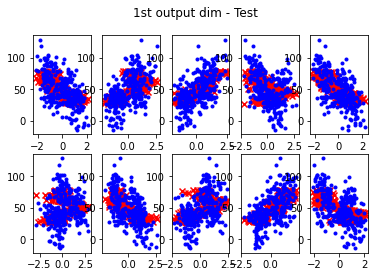

In [67]:
cup_model2 = SVR('sigmoid', box=10, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 1.0, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [68]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

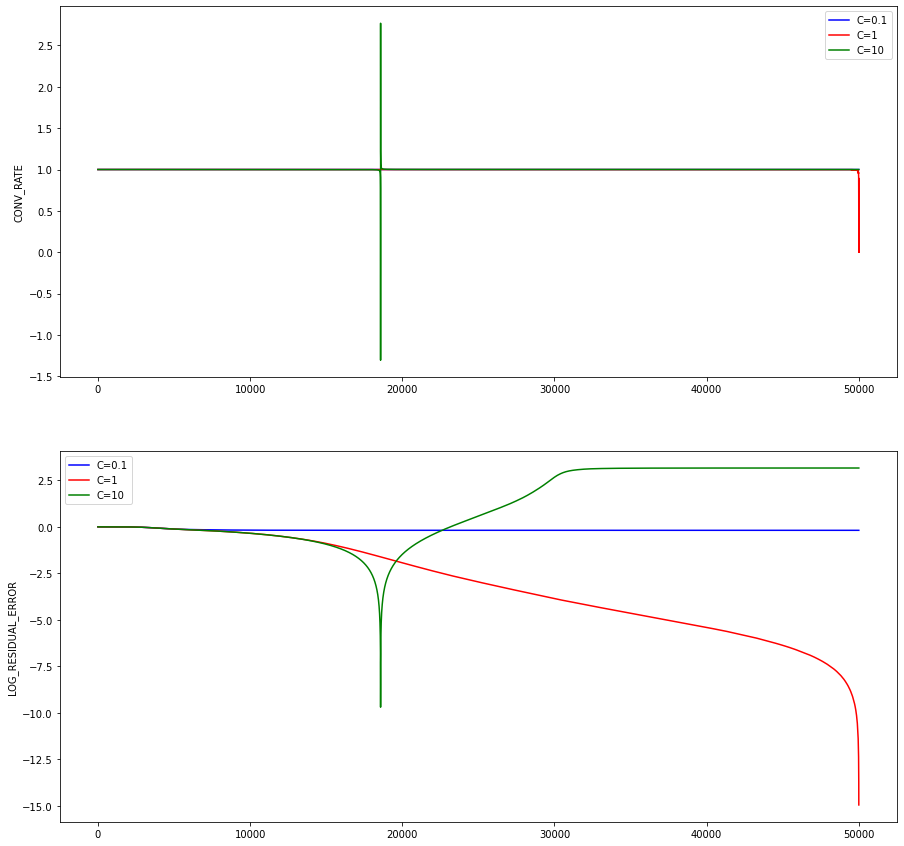

In [69]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

sig_10_0, sig_10_1, sig_10_2 = cup_model, cup_model, cup_model2

In [70]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-650.4906513680451,
 -3834.8149872815447,
 -94614.68102249883,
 array([ 0.84444028,  0.90189482, -0.91540353]))

# RBF

Training first model ... 


C:\Users\eliak\OneDrive\Desktop\UNIPI\ML_CM\ML-CM-Project\cm_scripts\SVR.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  plot_conv_rate.append((self.history['f'][i+1] - self.history['fstar']) / (self.history['f'][i] - self.history['fstar']))
C:\Users\eliak\OneDrive\Desktop\UNIPI\ML_CM\ML-CM-Project\cm_scripts\SVR.py:69: RuntimeWarning: divide by zero encountered in log
  log_residual_error.append(np.log(np.abs(self.history['f'][i] - self.history['fstar']) / np.abs(self.history['fstar'])))


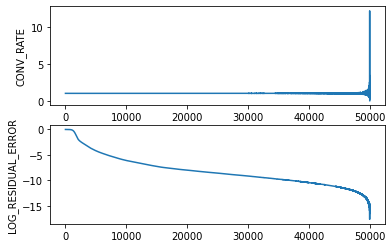

Fit time: 1306.6438031196594, #SV: 1208
SUM OF eps-LOSS: 29098.11029244779
DEVSET MEE: 3.6132895485347243


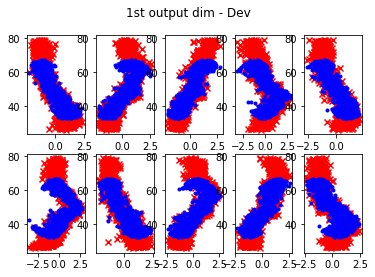

Testing the model
SUM OF eps-LOSS: 6897.311759225871
TEST MEE: 3.5334406278597132


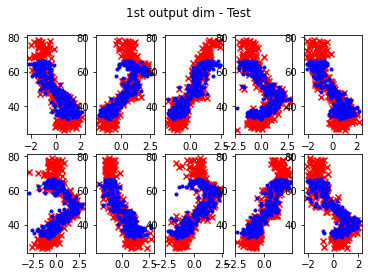

In [71]:
cup_model = SVR('rbf', box=0.1, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 1.0, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


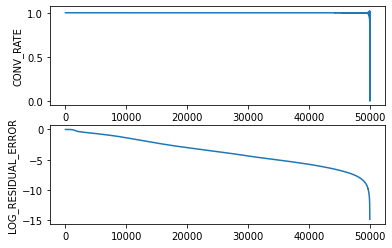

Fit time: 1492.5059931278229, #SV: 1213
SUM OF eps-LOSS: 7027.200262144704
DEVSET MEE: 1.8847638217873182


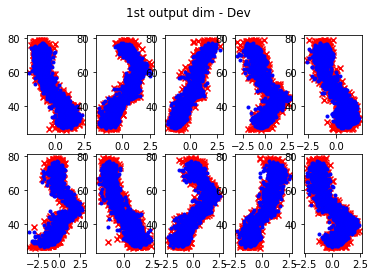

Testing the model
SUM OF eps-LOSS: 1963.046322169623
TEST MEE: 1.9682449443503809


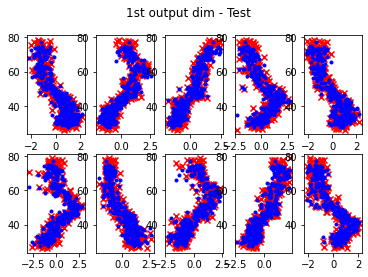

In [72]:
cup_model1 = SVR('rbf', box=1.0, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 1.0, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


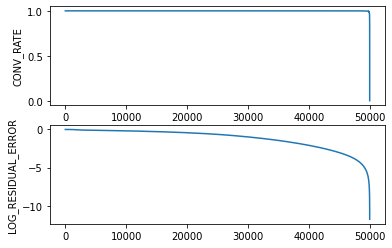

Fit time: 1577.692549943924, #SV: 1219
SUM OF eps-LOSS: 4673.882151210415
DEVSET MEE: 1.5672310272333863


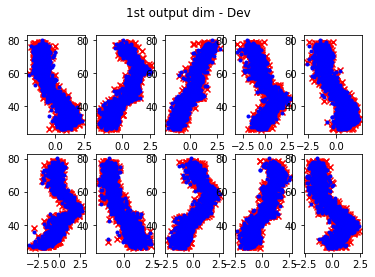

Testing the model
SUM OF eps-LOSS: 1643.0965130736981
TEST MEE: 1.8012835286129176


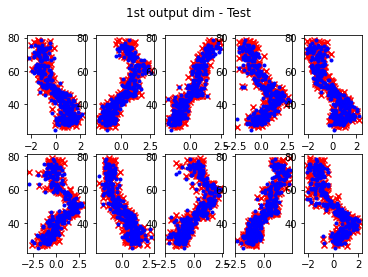

In [73]:
cup_model2 = SVR('rbf', box=10, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 1.0, 'maxiter': maxiter}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [74]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

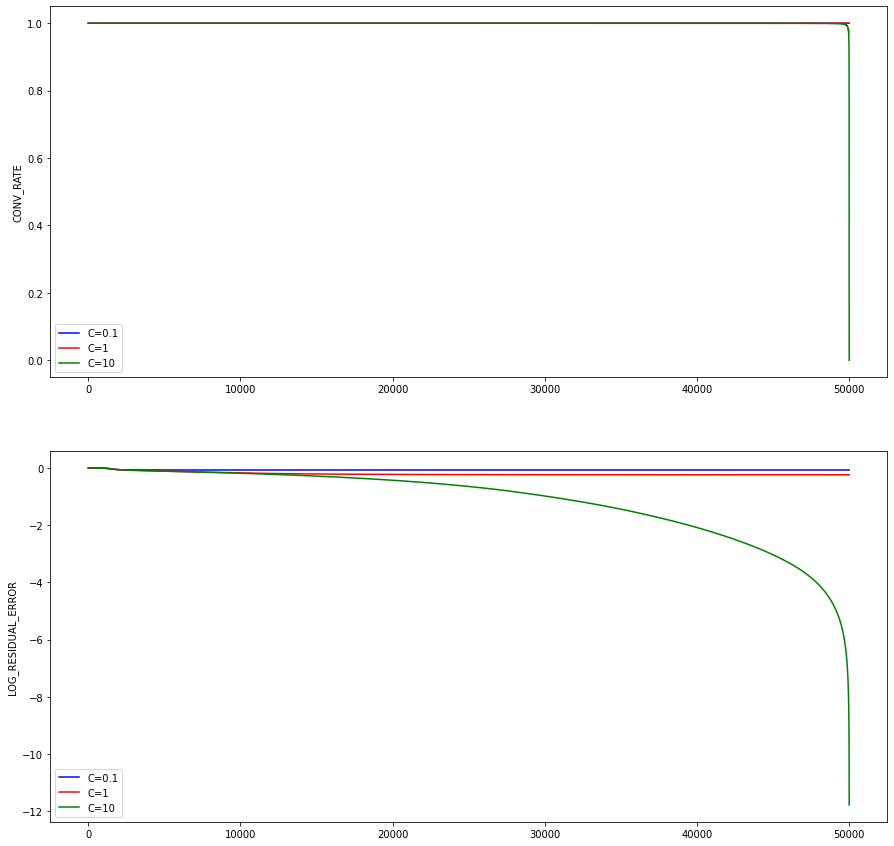

In [75]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

rbf_10_0, rbf_10_1, rbf_10_2 = cup_model, cup_model, cup_model2

In [76]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-666.1223814056068,
 -2087.97210217465,
 -9893.269931729923,
 array([0.89442645, 0.96911514, 0.97401744]))

# SAVING EVERY MODEL

In [77]:
with open("5e4_models", "wb") as f:
    pickle.dump({"lin1": lin_01_0, "lin2": lin_01_1, "lin3": lin_01_2, "lin4": lin_05_0, "lin5": lin_05_1, "lin6": lin_05_2, "lin7": lin_10_0, "lin8": lin_10_1, "lin9": lin_10_2, "poly1": poly_01_0, "poly2": poly_01_1, "poly3": poly_01_2, "poly4": poly_05_0, "poly5": poly_05_1, "poly6": poly_05_2, "poly7": poly_10_0, "poly8": poly_10_1, "poly9": poly_10_2, "sig1": sig_01_0, "sig2": sig_01_1, "sig3": sig_01_2, "sig4": sig_05_0, "sig5": sig_05_1, "sig6": sig_05_2, "sig7": sig_10_0, "sig8": sig_10_1, "sig9": sig_10_2, "rbf1": rbf_01_0, "rbf2": rbf_01_1, "rbf3": rbf_01_2, "rbf4": rbf_05_0, "rbf5": rbf_05_1, "rbf6": rbf_05_2, "rbf7": rbf_10_0, "rbf8": rbf_10_1, "rbf9": rbf_10_2}, f, protocol=pickle.HIGHEST_PROTOCOL)